In [ ]:
# This is an app written inside a notebook using ipywidgets

In [70]:
from fastai.vision.all import *
import ipywidgets as widgets
from ipywidgets import VBox

In [71]:
learn_inf = load_learner('export.pkl')

In [60]:
learn_inf.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([3.0661e-04, 9.9954e-01, 1.5114e-04]))

In [72]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

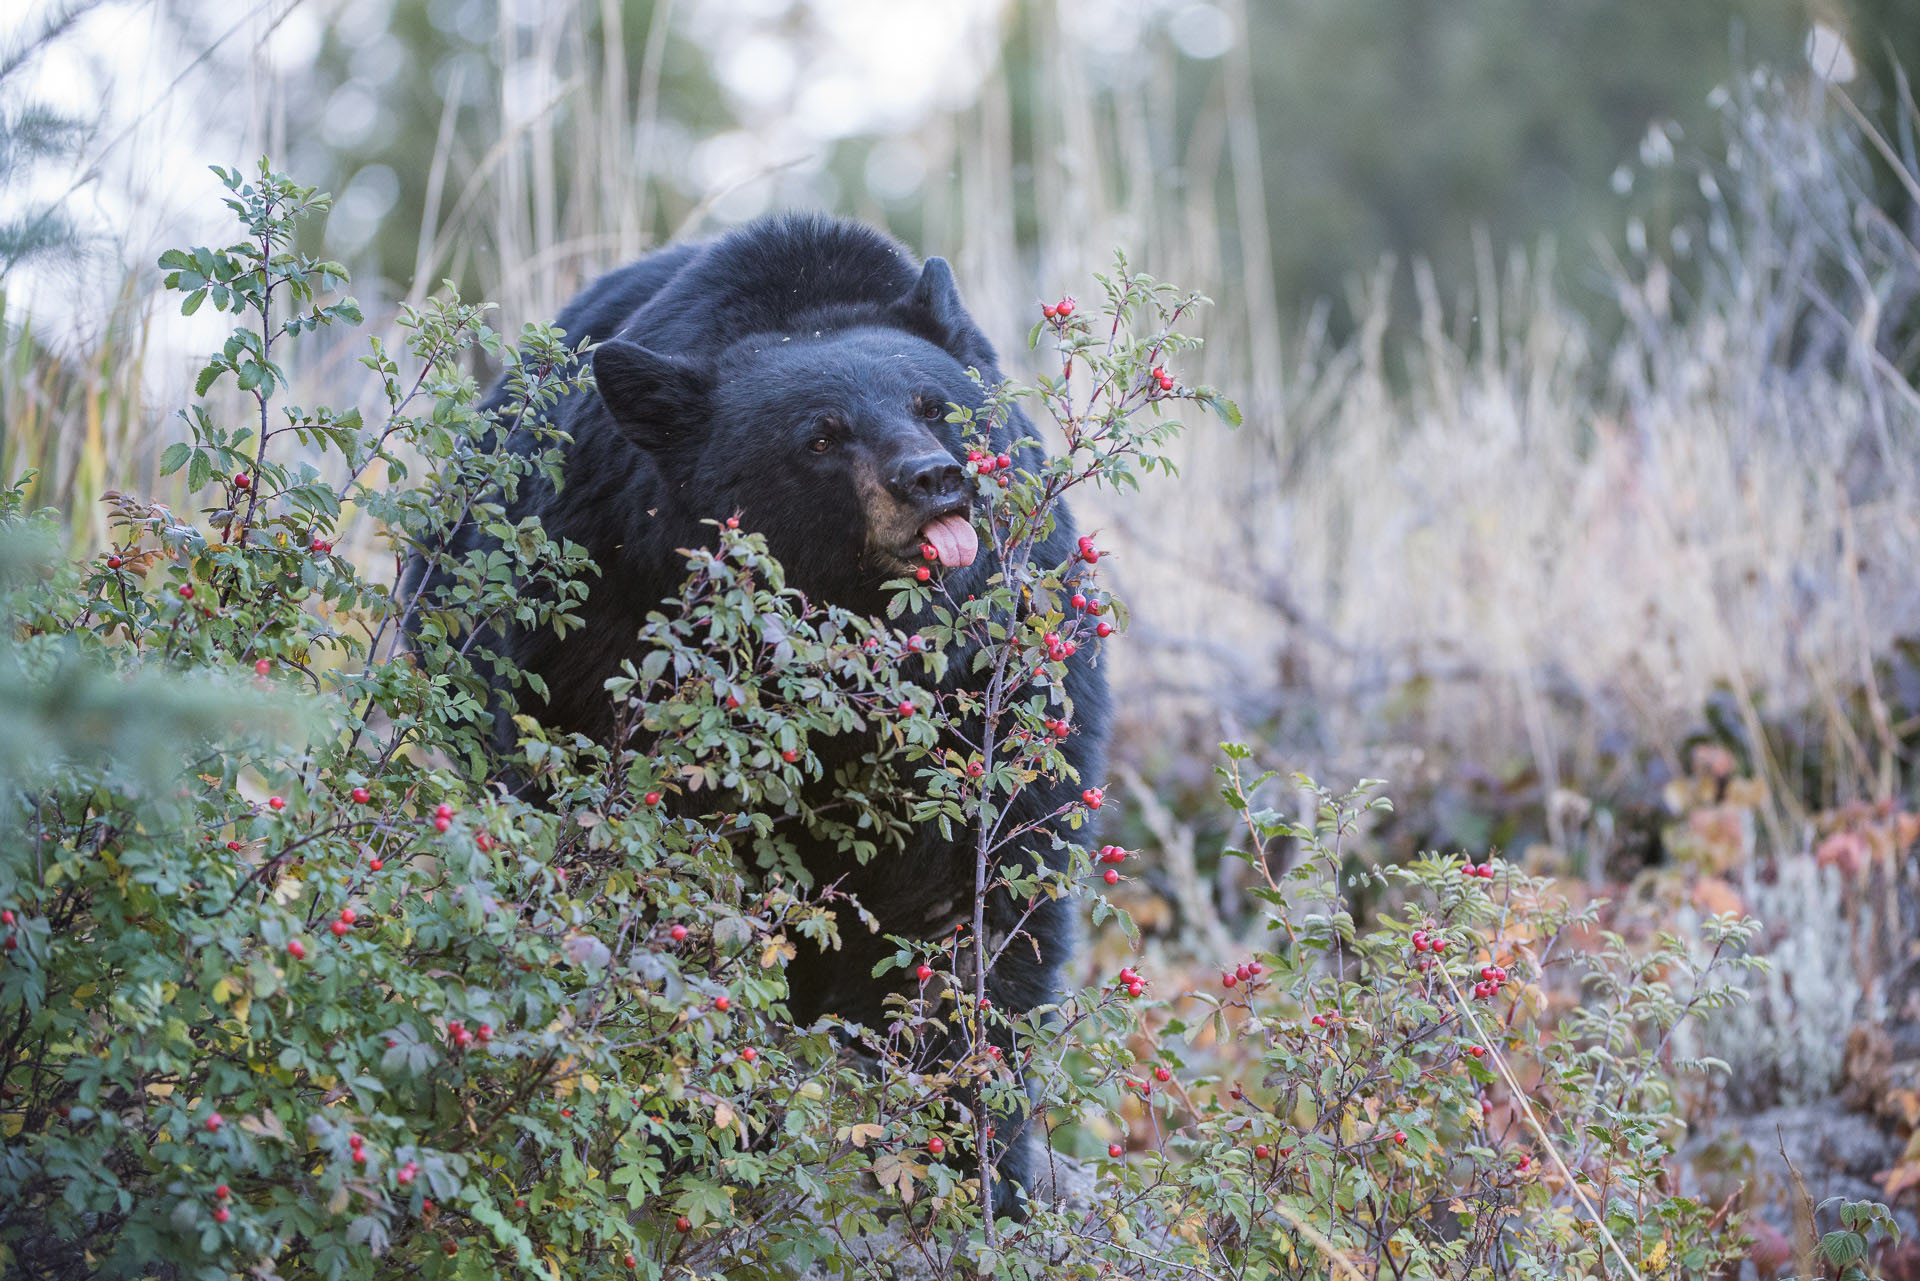

In [82]:
file_content = btn_upload.value[-1]['content']
file_bytes = io.BytesIO(file_content)
img = PILImage.create(file_bytes)
img

In [83]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [84]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black; Probability: 0.9754')

In [85]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [86]:
def on_click_classify(change):
    file_content = btn_upload.value[-1]['content']
    file_bytes = io.BytesIO(file_content)
    img = PILImage.create(file_bytes)
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [87]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [94]:
!pip install -Uq voila

In [95]:
!jupyter server extension enable --sys-prefix voila

Enabling: voila
- Writing config: /Users/dmartinec/repos/minima/.env/etc/jupyter
    - Validating voila...
      voila  OK
    - Extension successfully enabled.
